# Graphs

Today: graph visualization (graphviz)

Upcoming: graph computation (from classes)

**Nodes**: some kind of entity.  **Edges**: relationships between those entities.

In [1]:
from graphviz import Graph, Digraph # "di"rected graph

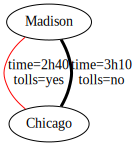

In [2]:
g = Graph()
g.node("A", "Madison")
g.node("B", "Chicago")
g.edge("A", "B", label="time=2h40\ntolls=yes", color="red")
g.edge("A", "B", label="time=3h10\ntolls=no", penwidth="3")
g

# Paths

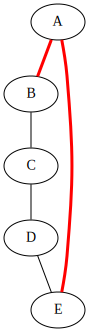

In [3]:
# path: sequence of edges to get from one node to another.
# is there a path from B to E?
# B->A->E
g = Graph()
g.node("A")
g.node("B")
g.node("C")
g.node("D")
g.node("E")
g.edge("A", "B", color="red", penwidth="3")
g.edge("B", "C")
g.edge("C", "D")
g.edge("D", "E")
g.edge("E", "A", color="red", penwidth="3")
g

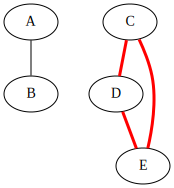

In [4]:
# connected: there is a path between any pair of nodes
# example of a graph that is NOT connected

# cycle: a sequence of paths that starts and ends at the same node (without repeats)
# C->D->E->C is a cycle
# A->B->A is NOT a cycle
g = Graph()
g.edge("A", "B")
g.edge("C", "D", color="red", penwidth="3")
g.edge("D", "E", color="red", penwidth="3")
g.edge("E", "C", color="red", penwidth="3")
g 

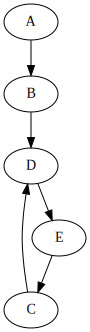

In [5]:
g = Digraph()
g.edge("A", "B")
g.edge("C", "D")
g.edge("D", "E")
g.edge("E", "C")
g.edge("B", "D")
#g.edge("E", "A") # would make it connected
g
# is it connected?  No, because there is no path, from D to A
# is it weakly connected (we can take edges backwards)?  Yes.
# for directed edge: source is called "parent", destination is called "child"

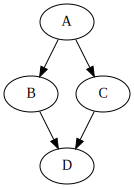

In [6]:
# Directed Acyclic Graph (DAG)
# D: directed edges
# A: a-cyclic (no cycles)
g = Digraph()
g.edge("A", "B")
g.edge("A", "C")
g.edge("C", "D")
g.edge("B", "D")
g
# git is an example of a DAG

# Trees

*Directed graphs* are a kind of *graph*

*DAGs* are a kind of *directed graph*.

*Trees* are a kind of *DAG*.

Trees have these additional restrictions beyond what DAGs require:
* they have exactly one node with no parents, called the root
* any additional nodes have exactly one parent

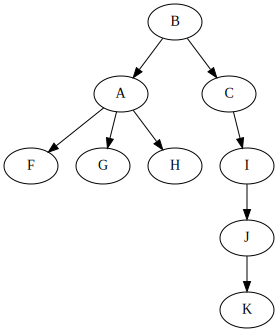

In [7]:
g = Digraph()
g.edge("B", "A")
g.edge("B", "C")
g.edge("A", "F")
g.edge("A", "G")
g.edge("A", "H")
g.edge("C", "I")
g.edge("I", "J")
g.edge("J", "K")
g

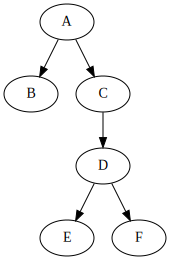

In [21]:
# binary tree (each node has at most 2 children)
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
        
    def draw_edges(self, g):
        if self.left != None:
            g.edge(self.val, self.left.val)
            self.left.draw_edges(g)
            
        if self.right != None:
            g.edge(self.val, self.right.val)
            self.right.draw_edges(g)

    def _repr_svg_(self):
        g = Digraph()
        self.draw_edges(g)
        return g._repr_svg_()

A = Node("A")
B = Node("B")
C = Node("C")
D = Node("D")
E = Node("E")
F = Node("F")
A.left = B
A.right = C
C.right = D
D.left = E
D.right = F
A